# _Questão 1_

## - Importação das bibliotecas utilizadas:

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

## - Carregamento dos dados do arquivo .csv para o programa:

In [2]:
dados_carnaval_2018 = pd.read_csv("Agenda_BL_Rua_Carnaval_Rio-2018_Imprensa.csv", sep=';')

## - Padronização dos dados do arquivo:

### . Remoção de coluna problemática:

In [3]:
dados_carnaval_2018 = dados_carnaval_2018.drop(columns=['Unnamed: 12'])

### . Padronização do nome das colunas:

In [4]:
dados_carnaval_2018.columns = ['bloco', 'bairro', 'regiao', 'data', 'data_relativa', 'concentracao', 'desfile', 'final', 'local_da_concentracao', 'percurso', 'publico_estimado', 'ano_primeiro_desfile']

### . Conversão das datas de string para formato apropriado para datas:

In [5]:
dados_carnaval_2018['data'] = pd.to_datetime(dados_carnaval_2018['data'], dayfirst = True)

## - Frequência de blocos por dia:

### . Contagem por dia: 

In [6]:
frequencia_por_dia = dados_carnaval_2018.groupby(dados_carnaval_2018['data'].dt.date, as_index=False).size().rename(columns={'size':'qtd_blocos', 'data':'dia'}).sort_values('dia')

### . Salvamento dos resultados em um novo arquivo *.csv*:

In [7]:
frequencia_por_dia.to_csv("frequencia_blocos_por_dia.csv", index=False)

### . Plotagem dos dados do novo arquivo:

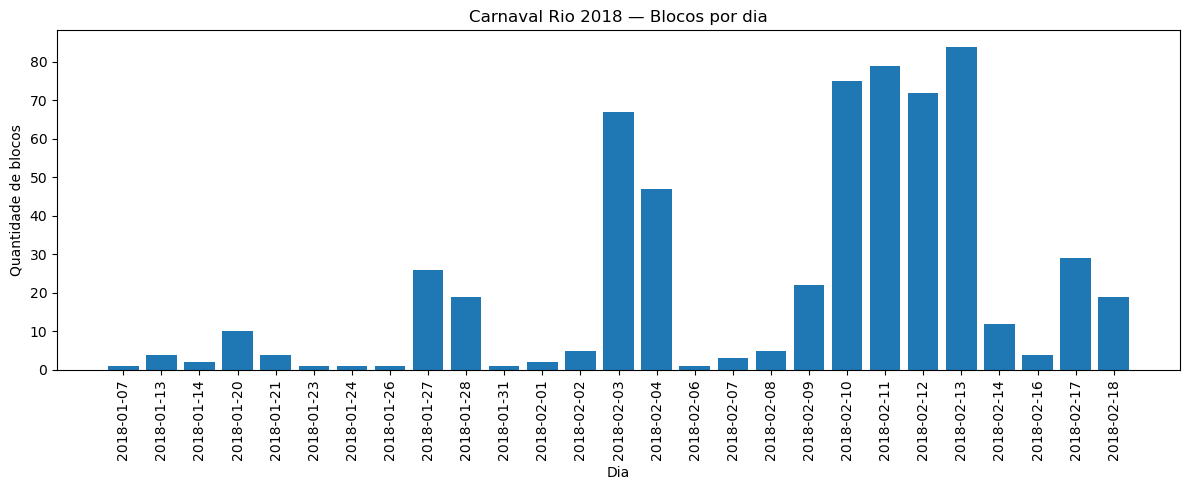

In [8]:
plt.figure(figsize=(12, 5))
plt.bar(frequencia_por_dia['dia'].astype(str), frequencia_por_dia['qtd_blocos'])
plt.xticks(rotation=90)
plt.title("Carnaval Rio 2018 — Blocos por dia")
plt.xlabel("Dia")
plt.ylabel("Quantidade de blocos")
plt.tight_layout()
plt.show()

### . **Conclusões:**

1. O período com a maior quantidade de blocos realizados é o compreendido entre os dias 10 e 13 de fevereiro. Mais da metade (52%) dos blocos do carnaval de 2018 ocorreram nesses quatro dias. Isso se deve ao fato do dia do feriado de carnaval ter sido no dia 13 de fevereiro.
   
2. Também houve um pico de ocorrência de blocos nos dias 27 e 28 de janeiro, e 3 e 4 de fevereiro. Isso aconteceu pois foram os fins de semana que antecederam a data oficial do carnaval.

## - Concentração de blocos por bairro:

### . Contagem dos blocos por bairro: 

In [9]:
concentracao_por_bairro = (dados_carnaval_2018.groupby('bairro', as_index=False).size().rename(columns={'size':'qtd_blocos'}).sort_values('qtd_blocos', ascending=False))

### . Salvamento dos dados em um novo arquivo *.csv*:

In [10]:
concentracao_por_bairro.to_csv("concentracao_por_bairro.csv", index=False)

### . Plotagem dos dados salvos no novo arquivo:

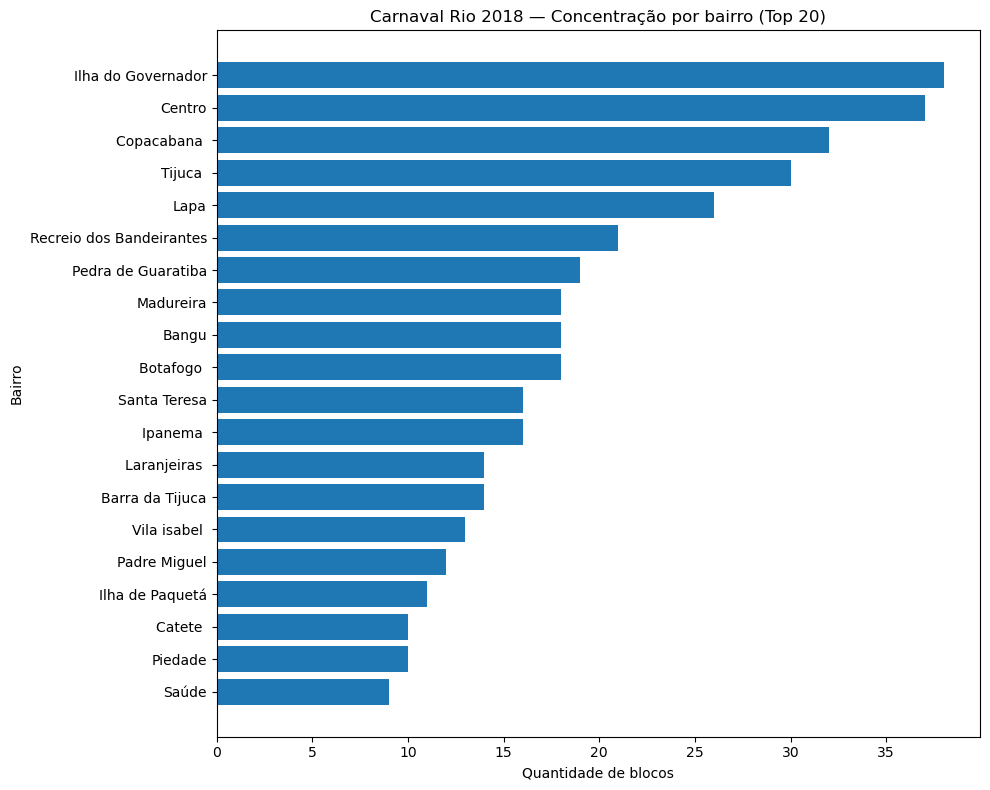

In [11]:
top_bairros = concentracao_por_bairro.head(20).iloc[::-1] 
plt.figure(figsize=(10, 8))
plt.barh(top_bairros['bairro'], top_bairros['qtd_blocos'])
plt.title("Carnaval Rio 2018 — Concentração por bairro (Top 20)")
plt.xlabel("Quantidade de blocos")
plt.ylabel("Bairro")
plt.tight_layout()
plt.show()

### . **Conclusões:**

1. O top 20 de bairros que mais receberam blocos revela uma grande distribuição espacial dos blocos no carnaval de 2018, pois todas as principais regiões da cidade tiveram eventos (Zona Norte, Zona Sul, Centro e Zona Oeste).